In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [3]:
import os
import glob

from pandas.api.types import CategoricalDtype

HOME = "/home/kwatchar3/spauq-home/spauq/expt/degradation/timit/results-2s/panboth"

results = glob.glob(os.path.join(HOME, "*.csv"))

dfs = []

for r in results:
    df = pd.read_csv(r).rename(columns={'Unnamed: 0': 'filename', 'Unnamed: 1': 'ref_pan', 'Unnamed: 2': 'est_pan'})
    # df = pd.read_csv(r).rename(columns={'Unnamed: 0': 'filename', 'Unnamed: 1': 'est_pan'})
    dfs.append(df)

# df['ref_pan'] = df['ref_pan'].apply(lambda x: np.round(x*10)/10)
# df['est_pan'] = df['est_pan'].apply(lambda x: np.round(x*10)/10)
df['pan_err'] = df['est_pan'] - df['ref_pan']

In [4]:
dfm = df.groupby(['ref_pan', 'est_pan']).median(numeric_only=True).reset_index()

In [5]:
p = np.concatenate([np.linspace(-1, 1, 100)])
l0 = 1/np.sqrt(2.0)
r0 = 1/np.sqrt(2.0)

l1 = np.cos((p+1) * np.pi/4)
r1 = np.sin((p+1) * np.pi/4)

s0 = -10 * np.log10(np.square(l1-l0) + np.square(r1-r0))
s1 = -10 * np.log10(4 * np.square(np.sin(np.pi*p/8)))

In [6]:
df

,filename,ref_pan,est_pan,SSR,SRR,cost,shift,scale,pan_err
0,fadg0,-1.0,-0.999900,80.000000,80.0,8.599051e-16,"[[0.0, 0.0], [0.0, 0.0]]","[[0.9999999969157487, 0.0], [7.853981625899068...",0.000100
1,fadg0,-1.0,-0.999699,72.540358,80.0,1.204582e-15,"[[0.0, 0.0], [0.0, 0.0]]","[[0.9999999721430086, 0.0], [0.000236038094003...",0.000301
2,fadg0,-1.0,-0.999097,62.982514,80.0,8.718458e-16,"[[0.0, 0.0], [0.0, 0.0]]","[[0.999999748395366, 0.0], [0.0007093724021701...",0.000903
3,fadg0,-1.0,-0.997286,53.424671,80.0,2.120443e-15,"[[0.0, 0.0], [0.0, 0.0]]","[[0.9999977275050176, 0.0], [0.002131896995857...",0.002714
4,fadg0,-1.0,-0.991842,43.866839,80.0,2.960335e-15,"[[0.0, 0.0], [0.0, 0.0]]","[[0.9999794748634385, 0.0], [0.006407015829685...",0.008158
...,...,...,...,...,...,...,...,...,...
12091,mwvw0,1.0,0.991842,43.866839,80.0,1.997918e-15,"[[0.0, 0.0], [0.0, 0.0]]","[[3.923165713955547e-19, 0.006407015829685763]...",-0.008158
12092,mwvw0,1.0,0.997286,53.424671,80.0,2.905901e-15,"[[0.0, 0.0], [0.0, 0.0]]","[[1.3054104160443238e-19, 0.002131896995857420...",-0.002714
12093,mwvw0,1.0,0.999097,62.982514,80.0,1.816138e-18,"[[0.0, 0.0], [0.0, 0.0]]","[[4.3436532086065546e-20, 0.000709372402170287...",-0.000903
12094,mwvw0,1.0,0.999699,72.540358,80.0,2.798074e-15,"[[0.0, 0.0], [0.0, 0.0]]","[[1.4453164814925212e-20, 0.000236038094003725...",-0.000301


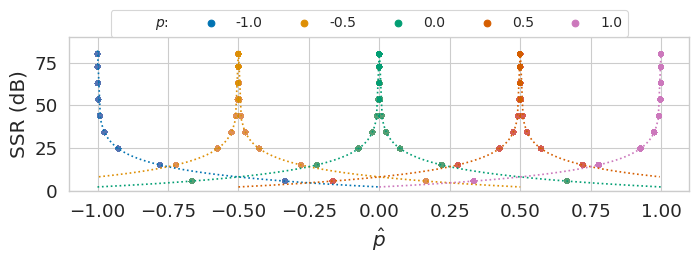

In [12]:
def theoretical_ssr(p0):
    p = np.concatenate([np.linspace(p0-1, p0-1e-4, 100), np.linspace(p0+1e-4, p0+1, 100)])
    p = p[(-1 <= p) & (p <=1)]
    
    return p, -10 * np.log10(4 * np.square(np.sin(np.pi*(p-p0)/8)))

sns.set("paper", "whitegrid", "colorblind", font_scale=1.5)
f, ax = plt.subplots(figsize=(8,2))
refs = df['ref_pan'].unique()
# print(refs)
n_ref = len(refs)
cmap = sns.color_palette(palette="colorblind", n_colors=n_ref)
sns.scatterplot(df, y='SSR', x='est_pan', hue='ref_pan', palette=cmap, ax=ax, edgecolor='none', alpha=0.005)
for i in range(n_ref):
    p, ssr = theoretical_ssr(refs[i])
    sns.lineplot(
        x=p, 
        y=ssr, 
        ls=':', 
        color=cmap[i]
    )
ax.set(ylim=[0, 90], ylabel='SSR (dB)', xlabel='$\hat{p}$')

ax.legend().remove()
h, l = ax.get_legend_handles_labels()
h = [plt.plot([], marker="", ls="")[0]] + h
l = ['$p$:'] + l
f.legend(h, l, loc='upper center', fontsize=10, ncols=n_ref+1, bbox_to_anchor=(0.5, 1.05))
plt.savefig("figs/pan.pdf", bbox_inches='tight')

plt.show()